In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
from citipy import citipy

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 36 of Set 25 | raudeberg
City not found. Skipping...
Processing Record 37 of Set 25 | palmares do sul
City not found. Skipping...
Processing Record 38 of Set 25 | vaini
City not found. Skipping...
Processing Record 39 of Set 25 | tura
City not found. Skipping...
Processing Record 40 of Set 25 | lucea
City not found. Skipping...
Processing Record 41 of Set 25 | nanortalik
City not found. Skipping...
Processing Record 42 of Set 25 | rikitea
City not found. Skipping...
Processing Record 43 of Set 25 | batticaloa
City not found. Skipping...
Processing Record 44 of Set 25 | new norfolk
City not found. Skipping...
Processing Record 45 of Set 25 | busselton
City not found. Skipping...
Processing Record 46 of Set 25 | aflu
City not found. Skipping...
Processing Record 47 of Set 25 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 25 | saint-philippe
City not found. Skipping...
Processing Record 49 of Set 25 | albany
City not found. Skipping...
Processing Reco

City not found. Skipping...
Processing Record 19 of Set 27 | westport
City not found. Skipping...
Processing Record 20 of Set 27 | vaitape
City not found. Skipping...
Processing Record 21 of Set 27 | castro
City not found. Skipping...
Processing Record 22 of Set 27 | puerto ayora
City not found. Skipping...
Processing Record 23 of Set 27 | lompoc
City not found. Skipping...
Processing Record 24 of Set 27 | saint-pierre
City not found. Skipping...
Processing Record 25 of Set 27 | acari
City not found. Skipping...
Processing Record 26 of Set 27 | mukhen
City not found. Skipping...
Processing Record 27 of Set 27 | bahia de caraquez
City not found. Skipping...
Processing Record 28 of Set 27 | gannan
City not found. Skipping...
Processing Record 29 of Set 27 | devyatka
City not found. Skipping...
Processing Record 30 of Set 27 | chuy
City not found. Skipping...
Processing Record 31 of Set 27 | sisophon
City not found. Skipping...
Processing Record 32 of Set 27 | cidreira
City not found. Ski

KeyboardInterrupt: 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Raudeberg,61.9875,5.1352,52.47,78,100,11.59,NO,2022-07-16 19:35:16
1,Palmares Do Sul,-30.2578,-50.5097,71.40,77,46,8.25,BR,2022-07-16 19:32:42
2,Vaini,-21.2000,-175.2000,73.56,94,40,3.44,TO,2022-07-16 19:35:17
3,Tura,25.5198,90.2201,76.35,89,14,4.00,IN,2022-07-16 19:35:17
4,Lucea,18.4510,-78.1736,87.66,70,100,8.99,JM,2022-07-16 19:35:18
5,Nanortalik,60.1432,-45.2371,44.01,79,50,5.06,GL,2022-07-16 19:35:18
6,Rikitea,-23.1203,-134.9692,73.17,76,100,16.89,PF,2022-07-16 19:32:47
7,Batticaloa,7.7102,81.6924,80.85,69,100,6.58,LK,2022-07-16 19:35:18
8,New Norfolk,-42.7826,147.0587,50.92,85,100,1.99,AU,2022-07-16 19:35:19
9,Busselton,-33.6500,115.3333,57.25,74,95,7.65,AU,2022-07-16 19:35:19


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2022-07-16 19:35:16,61.9875,5.1352,52.47,78,100,11.59
1,Palmares Do Sul,BR,2022-07-16 19:32:42,-30.2578,-50.5097,71.40,77,46,8.25
2,Vaini,TO,2022-07-16 19:35:17,-21.2000,-175.2000,73.56,94,40,3.44
3,Tura,IN,2022-07-16 19:35:17,25.5198,90.2201,76.35,89,14,4.00
4,Lucea,JM,2022-07-16 19:35:18,18.4510,-78.1736,87.66,70,100,8.99
...,...,...,...,...,...,...,...,...,...
572,Butembo,CD,2022-07-16 19:50:26,0.1500,29.2833,58.91,80,10,2.19
573,Sabha,LY,2022-07-16 19:50:27,27.0377,14.4283,85.15,19,0,8.75
574,Palaikastron,GR,2022-07-16 19:50:27,35.2000,26.2500,76.37,66,0,20.49
575,Kulhudhuffushi,MV,2022-07-16 19:50:27,6.6221,73.0700,81.70,79,43,10.18


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

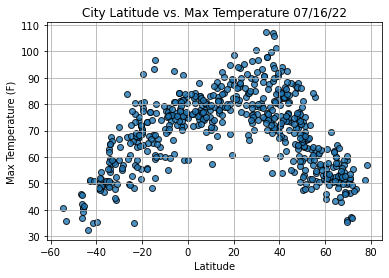

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

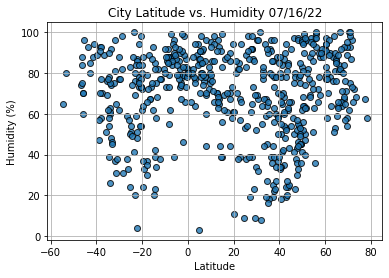

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

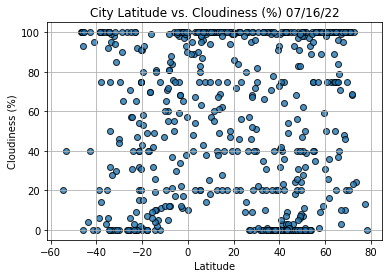

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

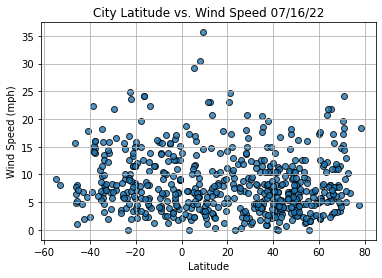

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2022-07-16 19:35:16,61.9875,5.1352,52.47,78,100,11.59
3,Tura,IN,2022-07-16 19:35:17,25.5198,90.2201,76.35,89,14,4.00
4,Lucea,JM,2022-07-16 19:35:18,18.4510,-78.1736,87.66,70,100,8.99
5,Nanortalik,GL,2022-07-16 19:35:18,60.1432,-45.2371,44.01,79,50,5.06
7,Batticaloa,LK,2022-07-16 19:35:18,7.7102,81.6924,80.85,69,100,6.58
...,...,...,...,...,...,...,...,...,...
572,Butembo,CD,2022-07-16 19:50:26,0.1500,29.2833,58.91,80,10,2.19
573,Sabha,LY,2022-07-16 19:50:27,27.0377,14.4283,85.15,19,0,8.75
574,Palaikastron,GR,2022-07-16 19:50:27,35.2000,26.2500,76.37,66,0,20.49
575,Kulhudhuffushi,MV,2022-07-16 19:50:27,6.6221,73.0700,81.70,79,43,10.18


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2022-07-16 19:35:16,61.9875,5.1352,52.47,78,100,11.59
3,Tura,IN,2022-07-16 19:35:17,25.5198,90.2201,76.35,89,14,4.00
4,Lucea,JM,2022-07-16 19:35:18,18.4510,-78.1736,87.66,70,100,8.99
5,Nanortalik,GL,2022-07-16 19:35:18,60.1432,-45.2371,44.01,79,50,5.06
7,Batticaloa,LK,2022-07-16 19:35:18,7.7102,81.6924,80.85,69,100,6.58


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

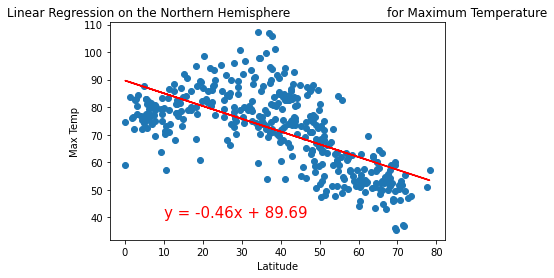

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

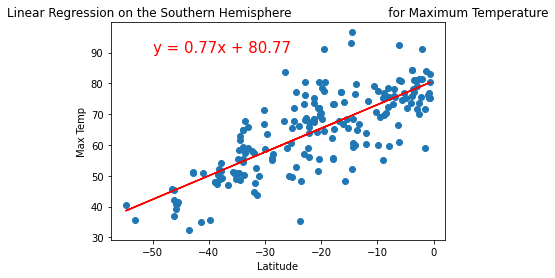

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

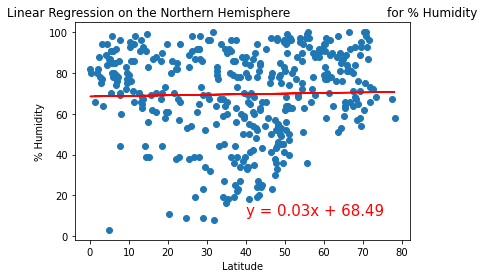

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


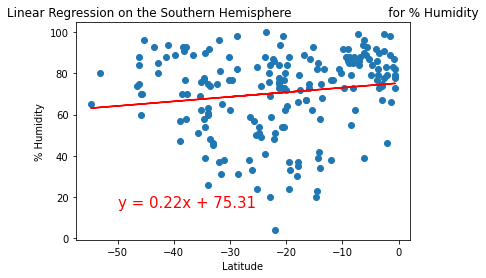

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

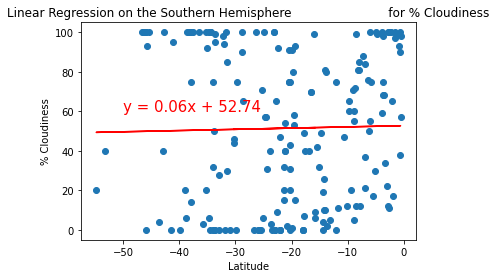

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

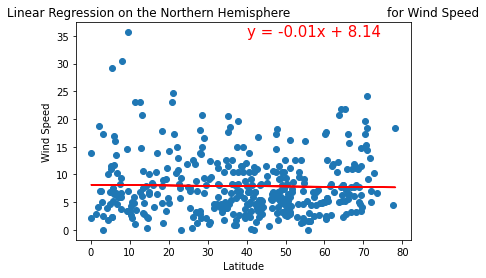

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

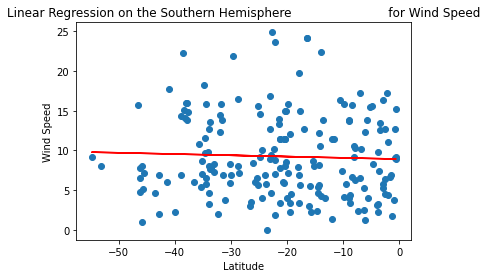

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [38]:
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -0.759, 'lat': 5.2618}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.81, 'feels_like': 74.93, 'temp_min': 73.81, 'temp_max': 73.81, 'pressure': 1016, 'humidity': 86, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 212, 'gust': 13.76}, 'clouds': {'all': 61}, 'dt': 1658098946, 'sys': {'country': 'GH', 'sunrise': 1658037432, 'sunset': 1658082044}, 'timezone': 0, 'id': 2297810, 'name': 'Mumford', 'cod': 200}


In [46]:
city_weather["weather"][0]["description"]

'broken clouds'